In [1]:
!python3 --version

Python 3.8.11


In [2]:
import pandas

from utils import calculate_percent_replicating_Target, calculate_percent_matching_Target, plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [3]:
variable = 'Plating density'

plate_df = pandas.DataFrame()

experiment_dict = {
    'A549':{
        'Compounds':{
            24:['BR00116991','BR00116992','BR00116993','BR00116994'],
            48:['BR00117015','BR00117016','BR00117017','BR00117019']},
        'ORF':{
            48:['BR00117020','BR00117021'],
            96:['BR00118050','BR00117006']},
        'CRISPR':{
            96:['BR00118041','BR00118042','BR00118043','BR00118044'],
            144:['BR00117000','BR00117003','BR00117004','BR00117005']}
            },
    'A549 80%':{
        'Compounds':{
            48:['BR00117008','BR00117009']}
            },
    'A549 120%':{
        'Compounds':{
            48:['BR00117054','BR00117055']}
            }            
    }

for eachline in list(experiment_dict.keys()):
    if eachline == 'A549':
        n_replicates = 4
    else:
        n_replicates = 2
    for eachmodality in ['Compounds']:
        for eachtimepoint in list(experiment_dict[eachline][eachmodality].keys()):
            for eachsphere in [None,'batch','plate']:
                plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint], 
                'Treatment timepoint' : eachtimepoint, variable : eachline, 'Percent Replicating' : calculate_percent_replicating_Target(
                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',experiment_dict[eachline][eachmodality][eachtimepoint],
                    sphere=eachsphere, n_replicates=n_replicates),'Modality':eachmodality, 'sphere':str(eachsphere)}, ignore_index=True)

Saved to ../figures/Plating density-Treatment timepoint.png


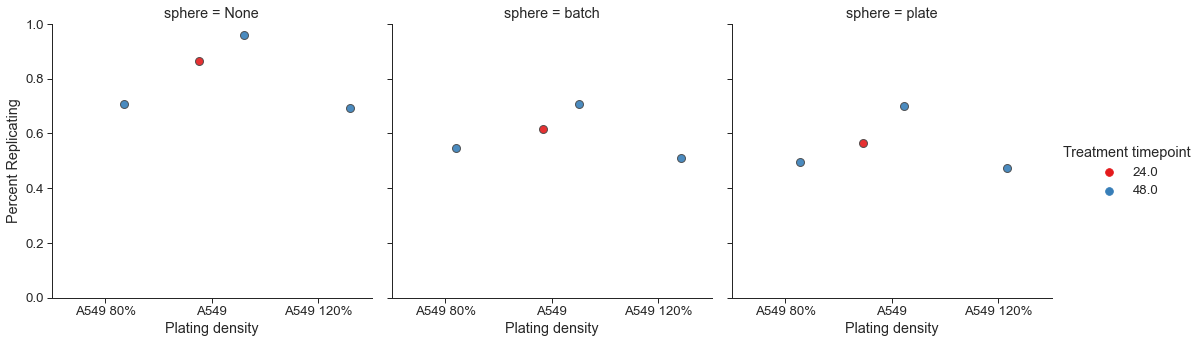

In [4]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,hue='Treatment timepoint',col = 'sphere', order=['A549 80%','A549', 'A549 120%'])

In [5]:
plate_match_df = pandas.DataFrame()

comparison_list = []

for eachline1 in list(experiment_dict.keys()):
    for eachline2 in list(experiment_dict.keys()):
        for eachmodality1 in list(experiment_dict[eachline1].keys()):
            for eachmodality2 in list(experiment_dict[eachline2].keys()):
                for eachtimepoint1 in list(experiment_dict[eachline1][eachmodality1].keys()):
                    for eachtimepoint2 in list(experiment_dict[eachline2][eachmodality2].keys()):
                        string1 = f"{eachline1}-{eachmodality1}-{eachtimepoint1}"
                        string2 = f"{eachline2}-{eachmodality2}-{eachtimepoint2}"
                        if string1 != string2:
                            if f"{string1}-{string2}" not in comparison_list:
                                if f"{string2}-{string1}" not in comparison_list:
                                    comparison_list.append(f"{string1}-{string2}")
                                    for eachsphere in [None,'batch','plate']:
                                        plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_Target(
                                            '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                            experiment_dict[eachline1][eachmodality1][eachtimepoint1],eachmodality1, 
                                            '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                            experiment_dict[eachline2][eachmodality2][eachtimepoint2],eachmodality2,sphere=eachsphere),
                                            'Modality Match' : enforce_modality_match_order(eachmodality1,eachmodality2), 
                                            'Treatment timepoint':enforce_timepoint_order(eachtimepoint1,eachtimepoint2),
                                            variable:f"{eachline1} - {eachline2}",'sphere':str(eachsphere)}, ignore_index=True)


/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/c

Saved to ../figures/PlatingDensity-PercentMatch-unsphered.png


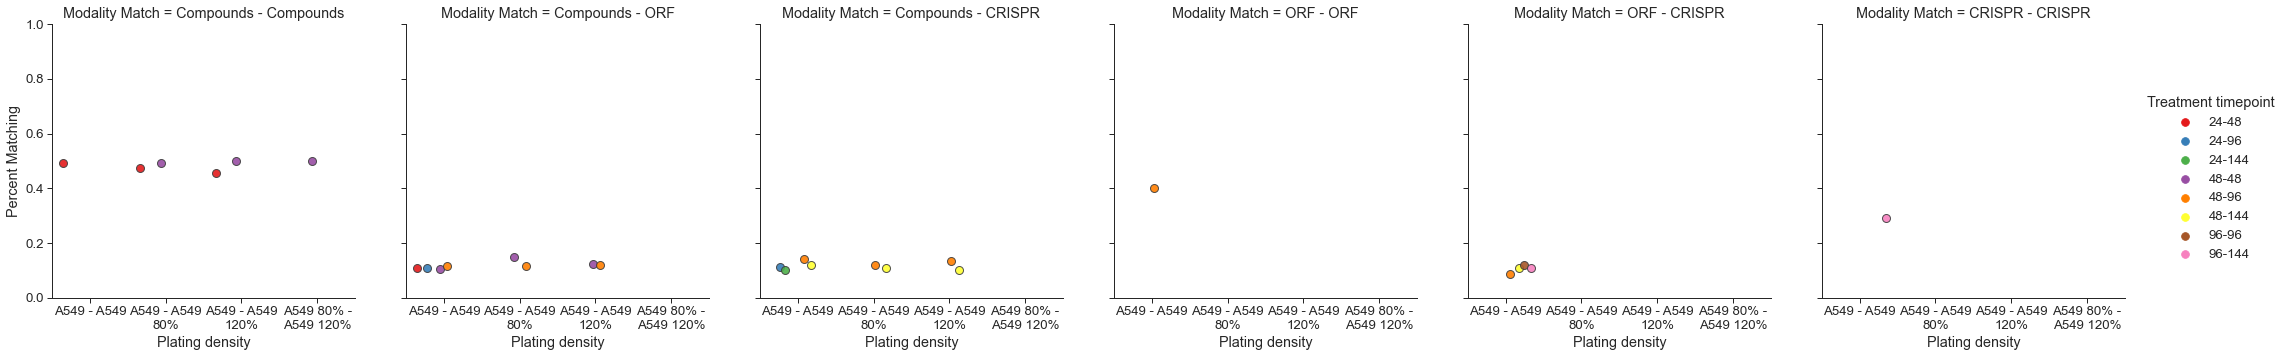

In [7]:
hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))
col_order = enforce_modality_match_order_in_plot(list(plate_match_df['Modality Match']))
unsphered = plate_match_df.query('sphere == "None"')
plot_simple_comparison(df=unsphered,x=variable,y='Percent Matching',hue='Treatment timepoint',
hue_order=hue_order, col = 'Modality Match', col_order = col_order,
plotname = 'PlatingDensity-PercentMatch-unsphered.png')

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/c

Saved to ../figures/PlatingDensity-PercentMatch-batchsphered.png


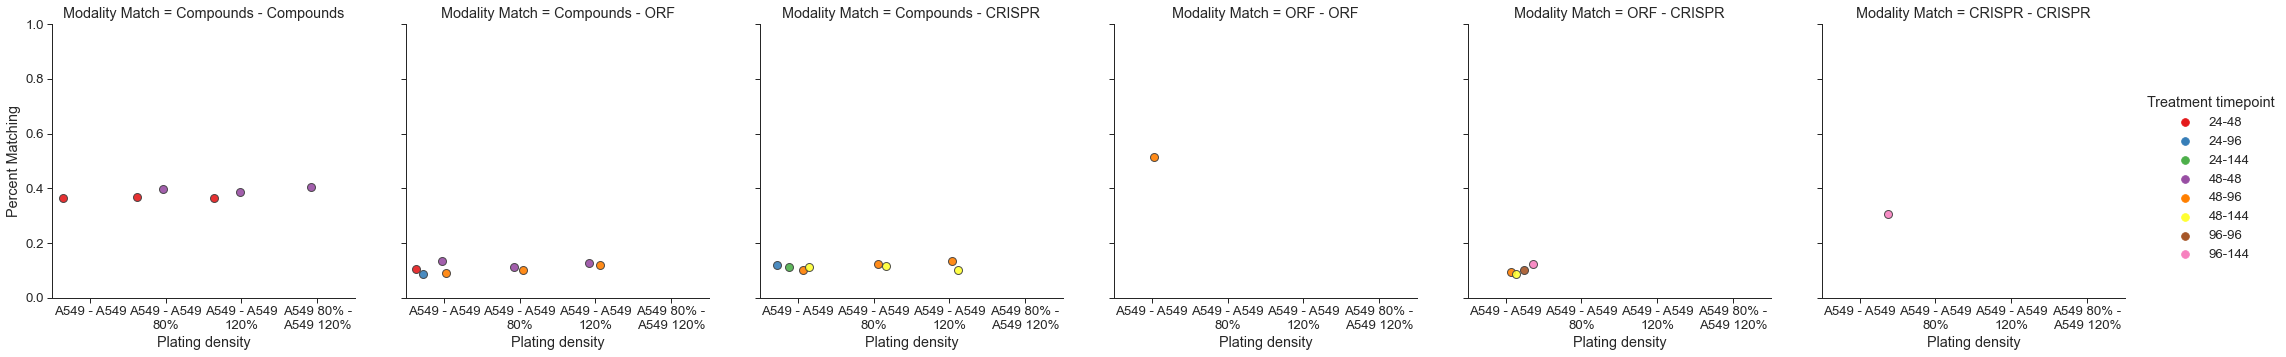

In [9]:
batchsphered = plate_match_df.query('sphere == "batch"')
plot_simple_comparison(df=batchsphered,x=variable,y='Percent Matching',hue='Treatment timepoint',
hue_order=hue_order,col = 'Modality Match', col_order = col_order, 
plotname = 'PlatingDensity-PercentMatch-batchsphered.png')

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/c

Saved to ../figures/PlatingDensity-PercentMatch-platesphered.png


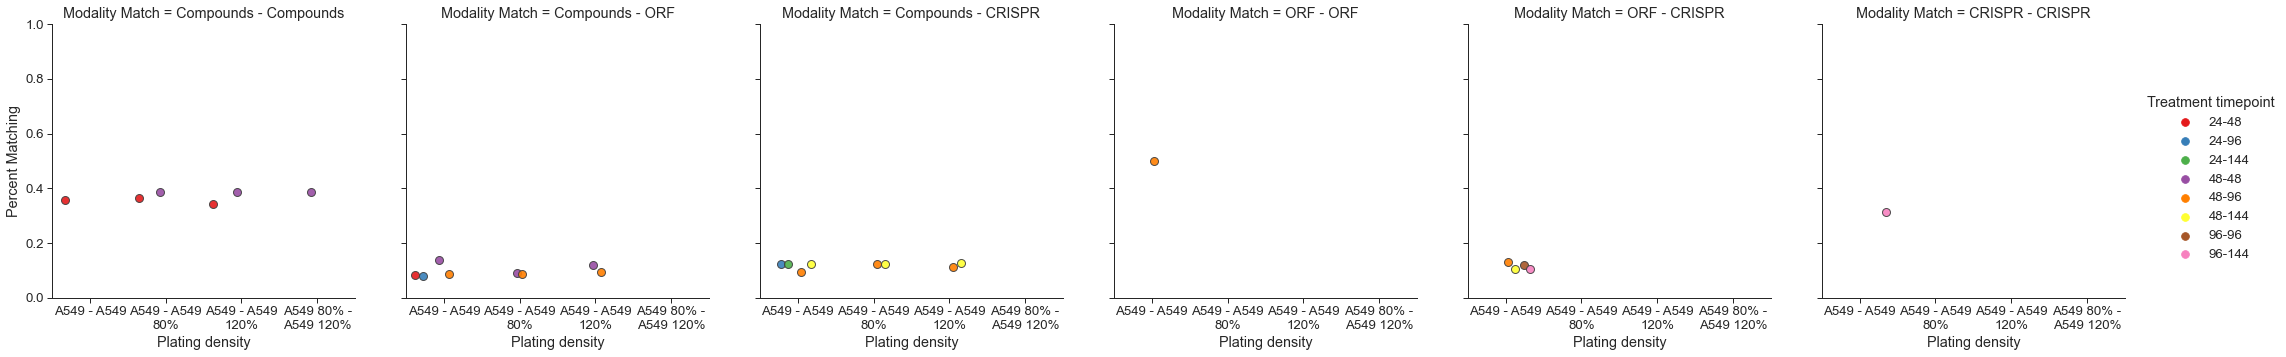

In [8]:
platesphered = plate_match_df.query('sphere == "plate"')
plot_simple_comparison(df=platesphered,x=variable,y='Percent Matching',hue='Treatment timepoint',
hue_order=hue_order,col = 'Modality Match', col_order = col_order, 
plotname = 'PlatingDensity-PercentMatch-platesphered.png')

Saved to ../figures/Density-PercentMatch-JustShowMatching.png


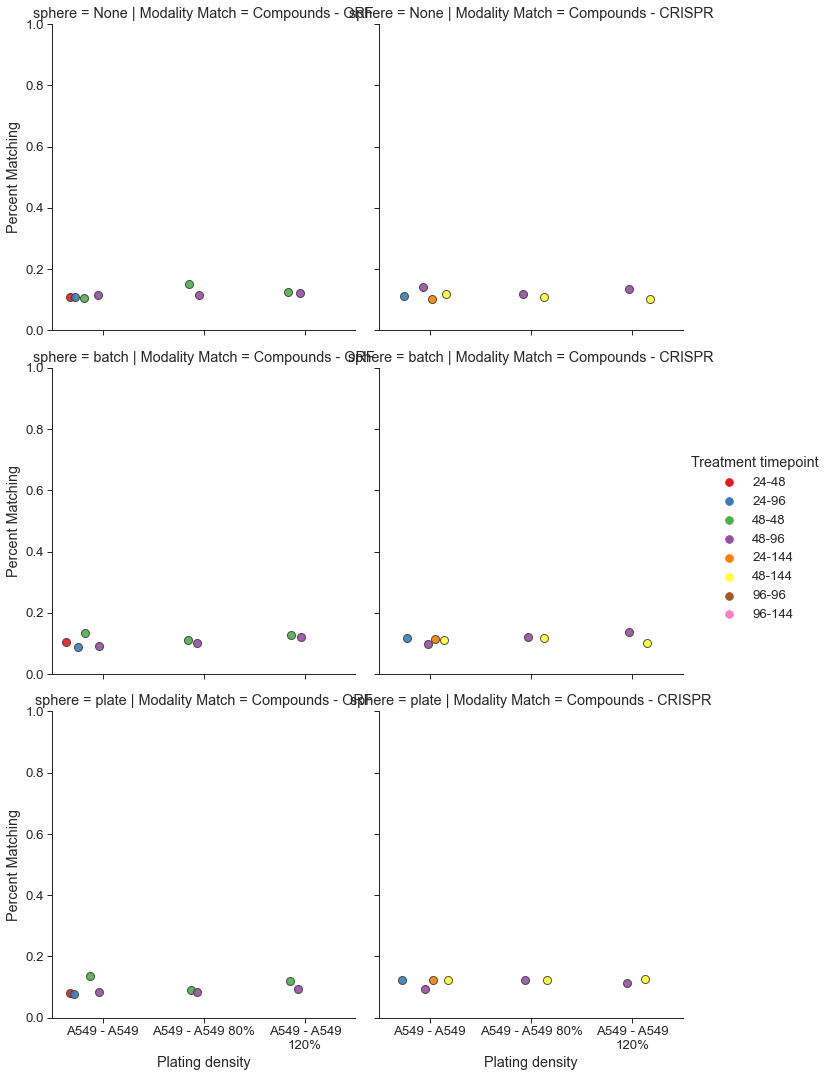

In [12]:
plot_simple_comparison(plate_match_df,x=variable,y='Percent Matching', 
order = ['A549 - A549','A549 - A549 80%','A549 - A549 120%'],
hue='Treatment timepoint',col = 'Modality Match',
col_order = ['Compounds - ORF','Compounds - CRISPR'],row='sphere',plotname = 'Density-PercentMatch-JustShowMatching.png')

In [11]:
plate_df.to_csv('checkpoint_csvs/AssessDensity-Replicating.csv',index=False)
plate_match_df.to_csv('checkpoint_csvs/AssessDensity-Matching.csv',index=False)